In [ ]:
!pip install wordcloud

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
import numpy as np

In [ ]:
# Load dataset
df = pd.read_csv("google_search_analysis.csv")
df['date'] = pd.to_datetime(df['date'], dayfirst=True, errors='coerce')

In [ ]:
# Display dataset info
print(f"Data shape: {df.shape}")
print("\nData:")
print(df.head())

Data shape: (574, 6)

Data:
        date               query  clicks  impressions    ctr   device
0 2025-01-01  data visualization       7           32  21.88   mobile
1 2025-01-01     python tutorial       6           21  28.57   mobile
2 2025-01-01     pandas tutorial       3           47   6.38  desktop
3 2025-01-01            AI tools       4           10  40.00  desktop
4 2025-01-01            AI tools       1           26   3.85  desktop


In [ ]:
print(df.tail())

    date             query  clicks  impressions    ctr   device
569  NaT   neural networks       4           43   9.30  desktop
570  NaT     deep learning       6           22  27.27   tablet
571  NaT  machine learning       4           21  19.05   mobile
572  NaT   neural networks       7           18  38.89   mobile
573  NaT       python vs r       5           31  16.13   tablet


In [ ]:
# Summary statistics
print("\nSummary statistics:")
print(df.describe())


Summary statistics:
                                date      clicks  impressions         ctr
count                            569  574.000000   574.000000  574.000000
mean   2025-01-28 23:44:48.927943680    4.477352    31.620209   16.531010
min              2025-01-01 00:00:00    0.000000     6.000000    0.000000
25%              2025-01-15 00:00:00    2.000000    20.000000    7.432500
50%              2025-01-28 00:00:00    4.000000    32.000000   14.290000
75%              2025-02-12 00:00:00    7.000000    43.000000   22.220000
max              2025-02-28 00:00:00    9.000000    58.000000   64.290000
std                              NaN    2.825095    13.407117   12.976434


In [ ]:
# Key Metrics
total_clicks = df['clicks'].sum()
total_impressions = df['impressions'].sum()
overall_ctr = (total_clicks / total_impressions * 100).round(2)
print(f"\nKey Metrics:")
print(f"Total Clicks: {total_clicks}")
print(f"Total Impressions: {total_impressions}")
print(f"Overall CTR: {overall_ctr}%")


Key Metrics:
Total Clicks: 2570
Total Impressions: 18150
Overall CTR: 14.16%


In [ ]:
# Device Performance
device_stats = df.groupby('device').agg({'clicks': 'sum', 'impressions': 'sum'})
device_stats['ctr'] = (device_stats['clicks'] / device_stats['impressions'] * 100).round(2)
print("\nDevice Performance:")
print(device_stats)


Device Performance:
         clicks  impressions    ctr
device                             
desktop     794         5454  14.56
mobile     1466        10684  13.72
tablet      310         2012  15.41


In [ ]:
# Trend Analysis
df['month'] = df['date'].dt.to_period('M')
monthly_clicks = df.groupby('month')['clicks'].sum()
monthly_impressions = df.groupby('month')['impressions'].sum()

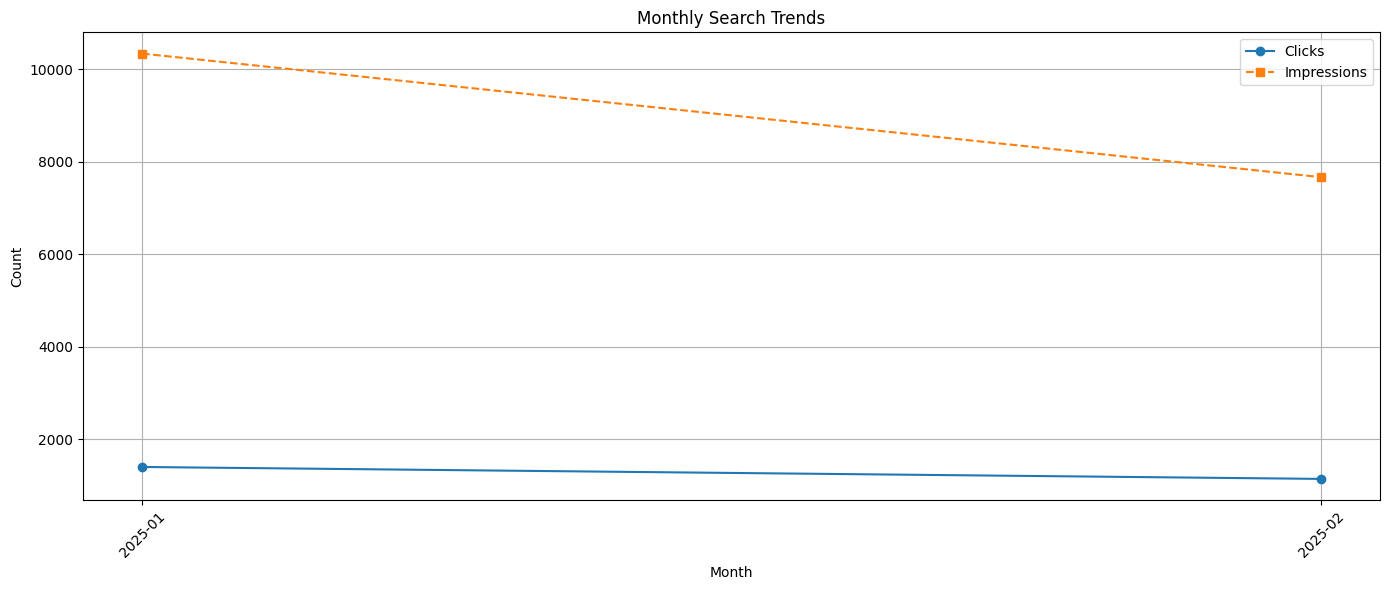

In [ ]:
plt.figure(figsize=(14, 6))
plt.plot(monthly_clicks.index.astype(str), monthly_clicks.values, marker='o', label='Clicks')
plt.plot(monthly_impressions.index.astype(str), monthly_impressions.values, marker='s', label='Impressions', linestyle='dashed')
plt.title('Monthly Search Trends')
plt.xlabel('Month')
plt.ylabel('Count')
plt.legend()
plt.grid()
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig('monthly_search_trends.png')
plt.show()

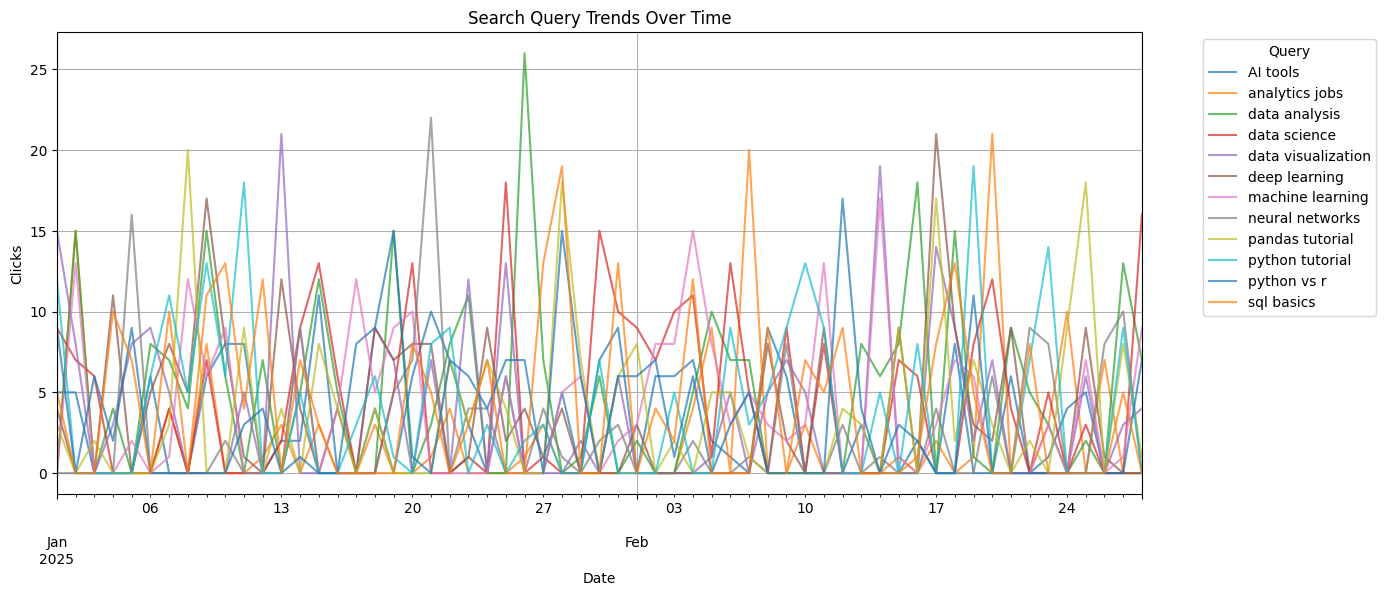

In [ ]:
# Query Performance Over Time
query_trend = df.groupby(['date', 'query'])['clicks'].sum().unstack().fillna(0)
query_trend.plot(figsize=(14, 6), alpha=0.7)
plt.title('Search Query Trends Over Time')
plt.xlabel('Date')
plt.ylabel('Clicks')
plt.legend(title='Query', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid()
plt.savefig('query_trends.png')
plt.show()

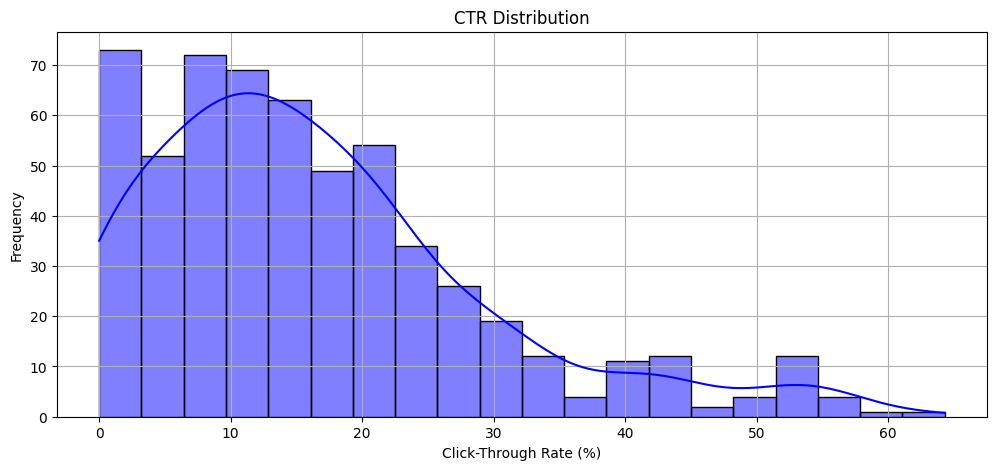

In [ ]:
# Click-Through Rate Distribution
plt.figure(figsize=(12, 5))
sns.histplot(df['ctr'], bins=20, kde=True, color='blue')
plt.title('CTR Distribution')
plt.xlabel('Click-Through Rate (%)')
plt.ylabel('Frequency')
plt.grid()
plt.savefig('ctr_distribution.png')
plt.show()

<ipython-input-14-03afe01ef1f0>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=daywise_clicks.index, y=daywise_clicks.values, palette='coolwarm')


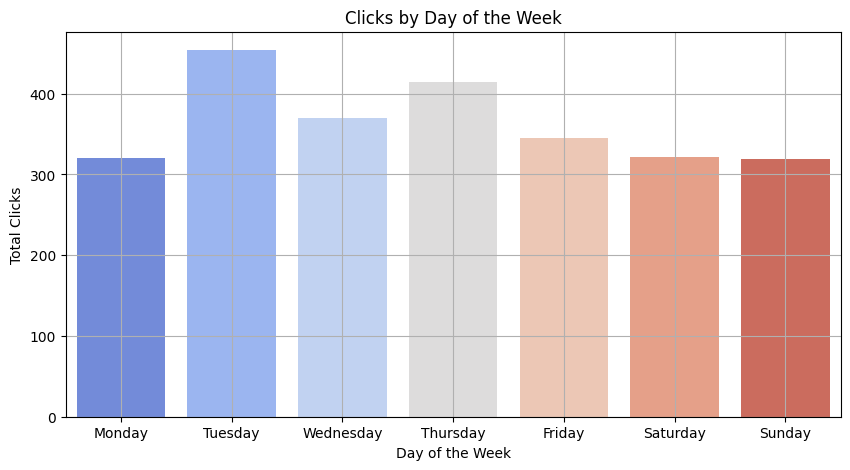

In [ ]:
# Clicks by Day of the Week
df['day_of_week'] = df['date'].dt.day_name()
daywise_clicks = df.groupby('day_of_week')['clicks'].sum().reindex([
    'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'
])

plt.figure(figsize=(10, 5))
sns.barplot(x=daywise_clicks.index, y=daywise_clicks.values, palette='coolwarm')
plt.title('Clicks by Day of the Week')
plt.xlabel('Day of the Week')
plt.ylabel('Total Clicks')
plt.grid()
plt.savefig('daywise_clicks.png')
plt.show()

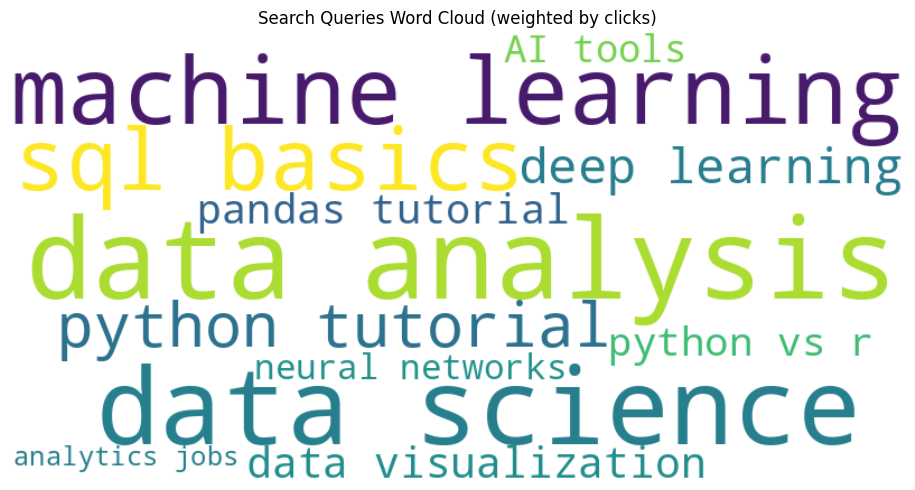

In [ ]:
# Generate word cloud
query_weights = df.groupby('query')['clicks'].sum().to_dict()
wordcloud = WordCloud(width=800, height=400, background_color='white', max_words=50, max_font_size=100).generate_from_frequencies(query_weights)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Search Queries Word Cloud (weighted by clicks)')
plt.tight_layout()
plt.savefig('search_queries_wordcloud.png')
plt.show()

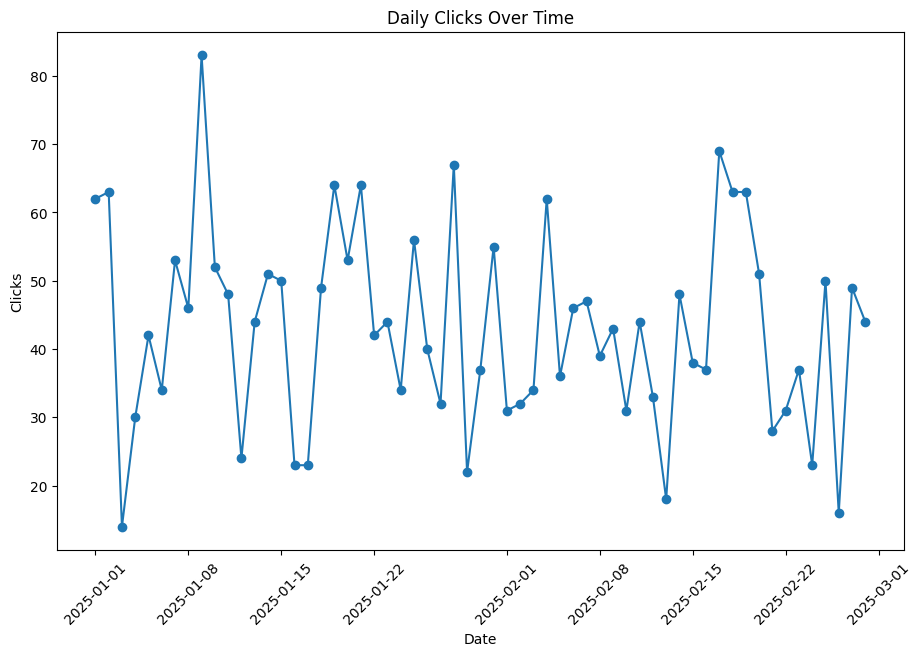

In [ ]:
# Visualizations
plt.figure(figsize=(18, 12))

# 1. Time Series Analysis - Daily Clicks
plt.subplot(2, 2, 1)
daily_clicks = df.groupby(df['date'].dt.date)['clicks'].sum()
plt.plot(daily_clicks.index, daily_clicks.values, marker='o', linestyle='-')
plt.title('Daily Clicks Over Time')
plt.xlabel('Date')
plt.ylabel('Clicks')
plt.xticks(rotation=45)
plt.tight_layout()

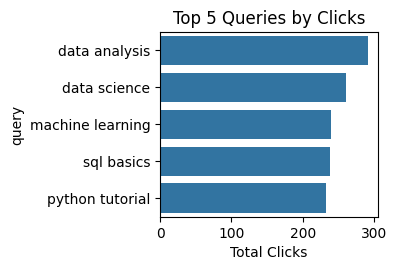

In [ ]:
# 2. Top Queries by Clicks
plt.subplot(2, 2, 2)
top_queries = df.groupby('query')['clicks'].sum().sort_values(ascending=False).head(5)
sns.barplot(x=top_queries.values, y=top_queries.index)
plt.title('Top 5 Queries by Clicks')
plt.xlabel('Total Clicks')
plt.tight_layout()

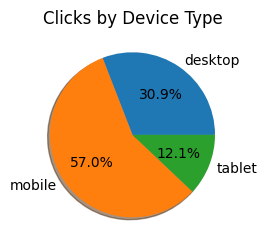

In [ ]:
# 3. Device Distribution
plt.subplot(2, 2, 3)
device_counts = df.groupby('device')['clicks'].sum()
plt.pie(device_counts, labels=device_counts.index, autopct='%1.1f%%', shadow=True)
plt.title('Clicks by Device Type')
plt.tight_layout()

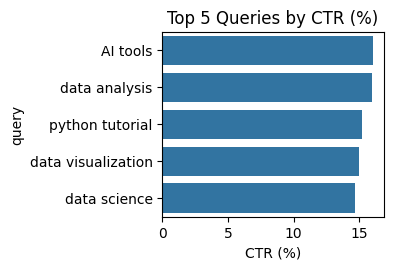

In [ ]:
# 4. Click-Through Rate (CTR) by Query
plt.subplot(2, 2, 4)
query_metrics = df.groupby('query').agg({'clicks': 'sum', 'impressions': 'sum'})
query_metrics['ctr'] = (query_metrics['clicks'] / query_metrics['impressions'] * 100).round(2)
top_ctr = query_metrics.sort_values('ctr', ascending=False).head(5)
sns.barplot(x=top_ctr['ctr'], y=top_ctr.index)
plt.title('Top 5 Queries by CTR (%)')
plt.xlabel('CTR (%)')
plt.tight_layout()